A biniary diasease classification probelm: the model built using CNN pretrained model called MobileNet.

In [ ]:
#Mouting a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imporitng all the necessary libraries
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense


In [ ]:
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
#%matplotlib inline

In [ ]:
import math
import datetime
import time

In [ ]:
#Dimensions
img_width, img_height = 150, 150

# loading up our datasets
train_data_dir = r'/content/drive/MyDrive/output/Banana_Data/train'
validation_data_dir =  r'/content/drive/MyDrive/output/Banana_Data/val'
test_data_dir = r'/content/drive/MyDrive/output/Banana_Data/test'


# number of epochs to train top model
epochs = 30 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 32

In [ ]:
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [ ]:
!pip install mobilenet-v3

In [ ]:
#Loading MobileNet model: It's a pretrained model for training the neural network
from keras.applications.mobilenet import MobileNet
mobilenet = MobileNet(weights='imagenet', include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
# Data generation for three data partitions (Training, validation, and testing)
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files
datagen_2=ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [ ]:

#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
import tensorflow as tf
start = datetime.datetime.now()

generator = datagen_2.flow_from_directory(
     train_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = mobilenet.predict_generator(generator, predict_size_train)

np.save(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobiletraining.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1585 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:07:17.715583


In [ ]:
# once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     validation_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=False)

nb_validation_samples = len(generator.filenames)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = mobilenet.predict_generator(
     generator, predict_size_validation)

np.save(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobilevalidation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 197 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:00:49.710072


In [ ]:
# once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     test_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=False)

nb_test_samples = len(generator.filenames)

predict_size_test = int(math.ceil(nb_test_samples / batch_size))

bottleneck_features_test = mobilenet.predict_generator(
     generator, predict_size_test)

np.save(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobiletesting.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 200 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:00:49.795963


In [ ]:
#training data
generator_top = datagen_2.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

# load the features saved earlier
train_data = np.load(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobiletraining.npy')

# get the class lBLE for the training data, in the original order
train_labels = generator_top.classes

# convert the training labels to categorical vectors
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 1585 images belonging to 3 classes.


In [ ]:
#validation data
generator_top = datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobilevalidation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 197 images belonging to 3 classes.


In [ ]:
#testing
generator_top = datagen.flow_from_directory(
         test_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_test_samples = len(generator_top.filenames)

test_data = np.load(r'/content/drive/MyDrive/Yordi_Research/Mobilenet/mobiletesting.npy')


test_labels = generator_top.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 200 images belonging to 3 classes.


In [ ]:
#Training the model
#This is the best model we found.
from tensorflow.keras import regularizers
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])


In [ ]:
top_model_weights_path='/content/drive/MyDrive/Yordi_Research/Mobilenet/mobilenet.h5'
history = model.fit(train_data, train_labels,
      epochs=30,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/30
50/50 [==============================] - 1s 11ms/step - loss: 2.0211 - acc: 0.4871 - val_loss: 0.9366 - val_acc: 0.6193
Epoch 2/30
50/50 [==============================] - 0s 6ms/step - loss: 1.0441 - acc: 0.5773 - val_loss: 0.8986 - val_acc: 0.6193
Epoch 3/30
50/50 [==============================] - 0s 6ms/step - loss: 0.9864 - acc: 0.5767 - val_loss: 0.9057 - val_acc: 0.6294
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.9500 - acc: 0.5950 - val_loss: 0.8605 - val_acc: 0.6142
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.9289 - acc: 0.6126 - val_loss: 0.8754 - val_acc: 0.6294
Epoch 6/30
50/50 [==============================] - 0s 6ms/step - loss: 0.9179 - acc: 0.6227 - val_loss: 0.8246 - val_acc: 0.6802
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.8537 - acc: 0.6385 - val_loss: 0.8339 - val_acc: 0.6396
Epoch 8/30
50/50 [==============================] - 0s 6ms/step - loss: 0.8745 - acc: 0.6

In [ ]:
#Model summary
model.summary()

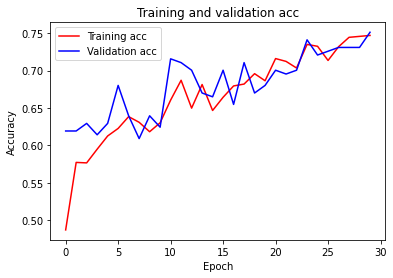

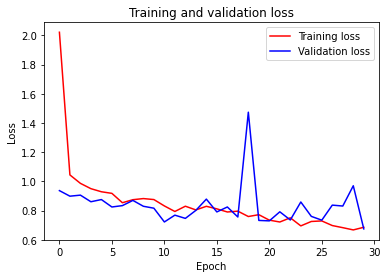

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#Classification metrics and confussion matrix
print('test data', validation_data)
preds = np.round(model.predict(validation_data),0)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[3.4156835  0.         0.         ... 0.         2.224344
    2.017618  ]
   [2.1891303  0.         0.         ... 0.         0.
    0.3450358 ]
   [1.0649934  0.         0.         ... 0.         0.
    0.        ]
   [2.2659845  0.         0.         ... 0.         0.
    0.3644494 ]]

  [[3.1788182  0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    1.1320149 ]]

  [[0.         0.         0.         ... 0.         0.
    1.5947114 ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.87355626 2.2282984
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.     

In [ ]:
plants = ['Healthy', 'Sigatoka']
classification_metrics = metrics.classification_report(validation_labels, preds, target_names=plants )
print(classification_metrics)

In [ ]:
#Model evaluation on testing set
model.evaluate(test_data, test_labels)